# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### The Imports

In [32]:
import pandas as pd
import numpy as np
import datetime

## Data

We will get stock information for the following banks:

*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**

1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to grab info on the stock.

**Use <code>read_pickle</code> to read data from <code>all_banks</code>.**

In [33]:
df = pd.read_pickle('mk008-project_finance/all_banks') 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
(BAC, Open)      2517 non-null float64
(BAC, High)      2517 non-null float64
(BAC, Low)       2517 non-null float64
(BAC, Close)     2517 non-null float64
(BAC, Volume)    2517 non-null int64
(C, Open)        2517 non-null float64
(C, High)        2517 non-null float64
(C, Low)         2517 non-null float64
(C, Close)       2517 non-null float64
(C, Volume)      2517 non-null int64
(GS, Open)       2517 non-null float64
(GS, High)       2517 non-null float64
(GS, Low)        2517 non-null float64
(GS, Close)      2517 non-null float64
(GS, Volume)     2517 non-null int64
(JPM, Open)      2517 non-null float64
(JPM, High)      2517 non-null float64
(JPM, Low)       2517 non-null float64
(JPM, Close)     2517 non-null float64
(JPM, Volume)    2517 non-null int64
(MS, Open)       2517 non-null float64
(MS, High)       2517 non-null float64
(MS, Low)        2517 non

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [34]:
tickers = [df.columns[i][0] for i in range(0,30,5)]
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Use <code>pd.concat</code> to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [35]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [36]:
bank_stocks = pd.concat([df['BAC'], df['C'], df['GS'], df['JPM'], df['MS'], df['WFC']], 
                        axis=1, 
                        keys=tickers)

**Set the column name levels:**

In [37]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [38]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# Exploratory Data Analysis

**What is the max Close price for each bank's stock throughout the time period?**

In [39]:
for ticker in tickers:
    print(ticker, bank_stocks[ticker]["Close"].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [40]:
# .xs is used to grab data from a multilevel indexed dataframe
bank_stocks.xs(key="Close", axis=1, level="Stock Info").max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [41]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [42]:
bank_stocks["BAC", "Close"].head()

Date
2006-01-03    47.08
2006-01-04    46.58
2006-01-05    46.64
2006-01-06    46.57
2006-01-09    46.60
Name: (BAC, Close), dtype: float64

In [43]:
for ticker in tickers:
    returns[ticker + " Return"] = bank_stocks[ticker, "Close"].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

**Create a pairplot using seaborn of the returns dataframe.**

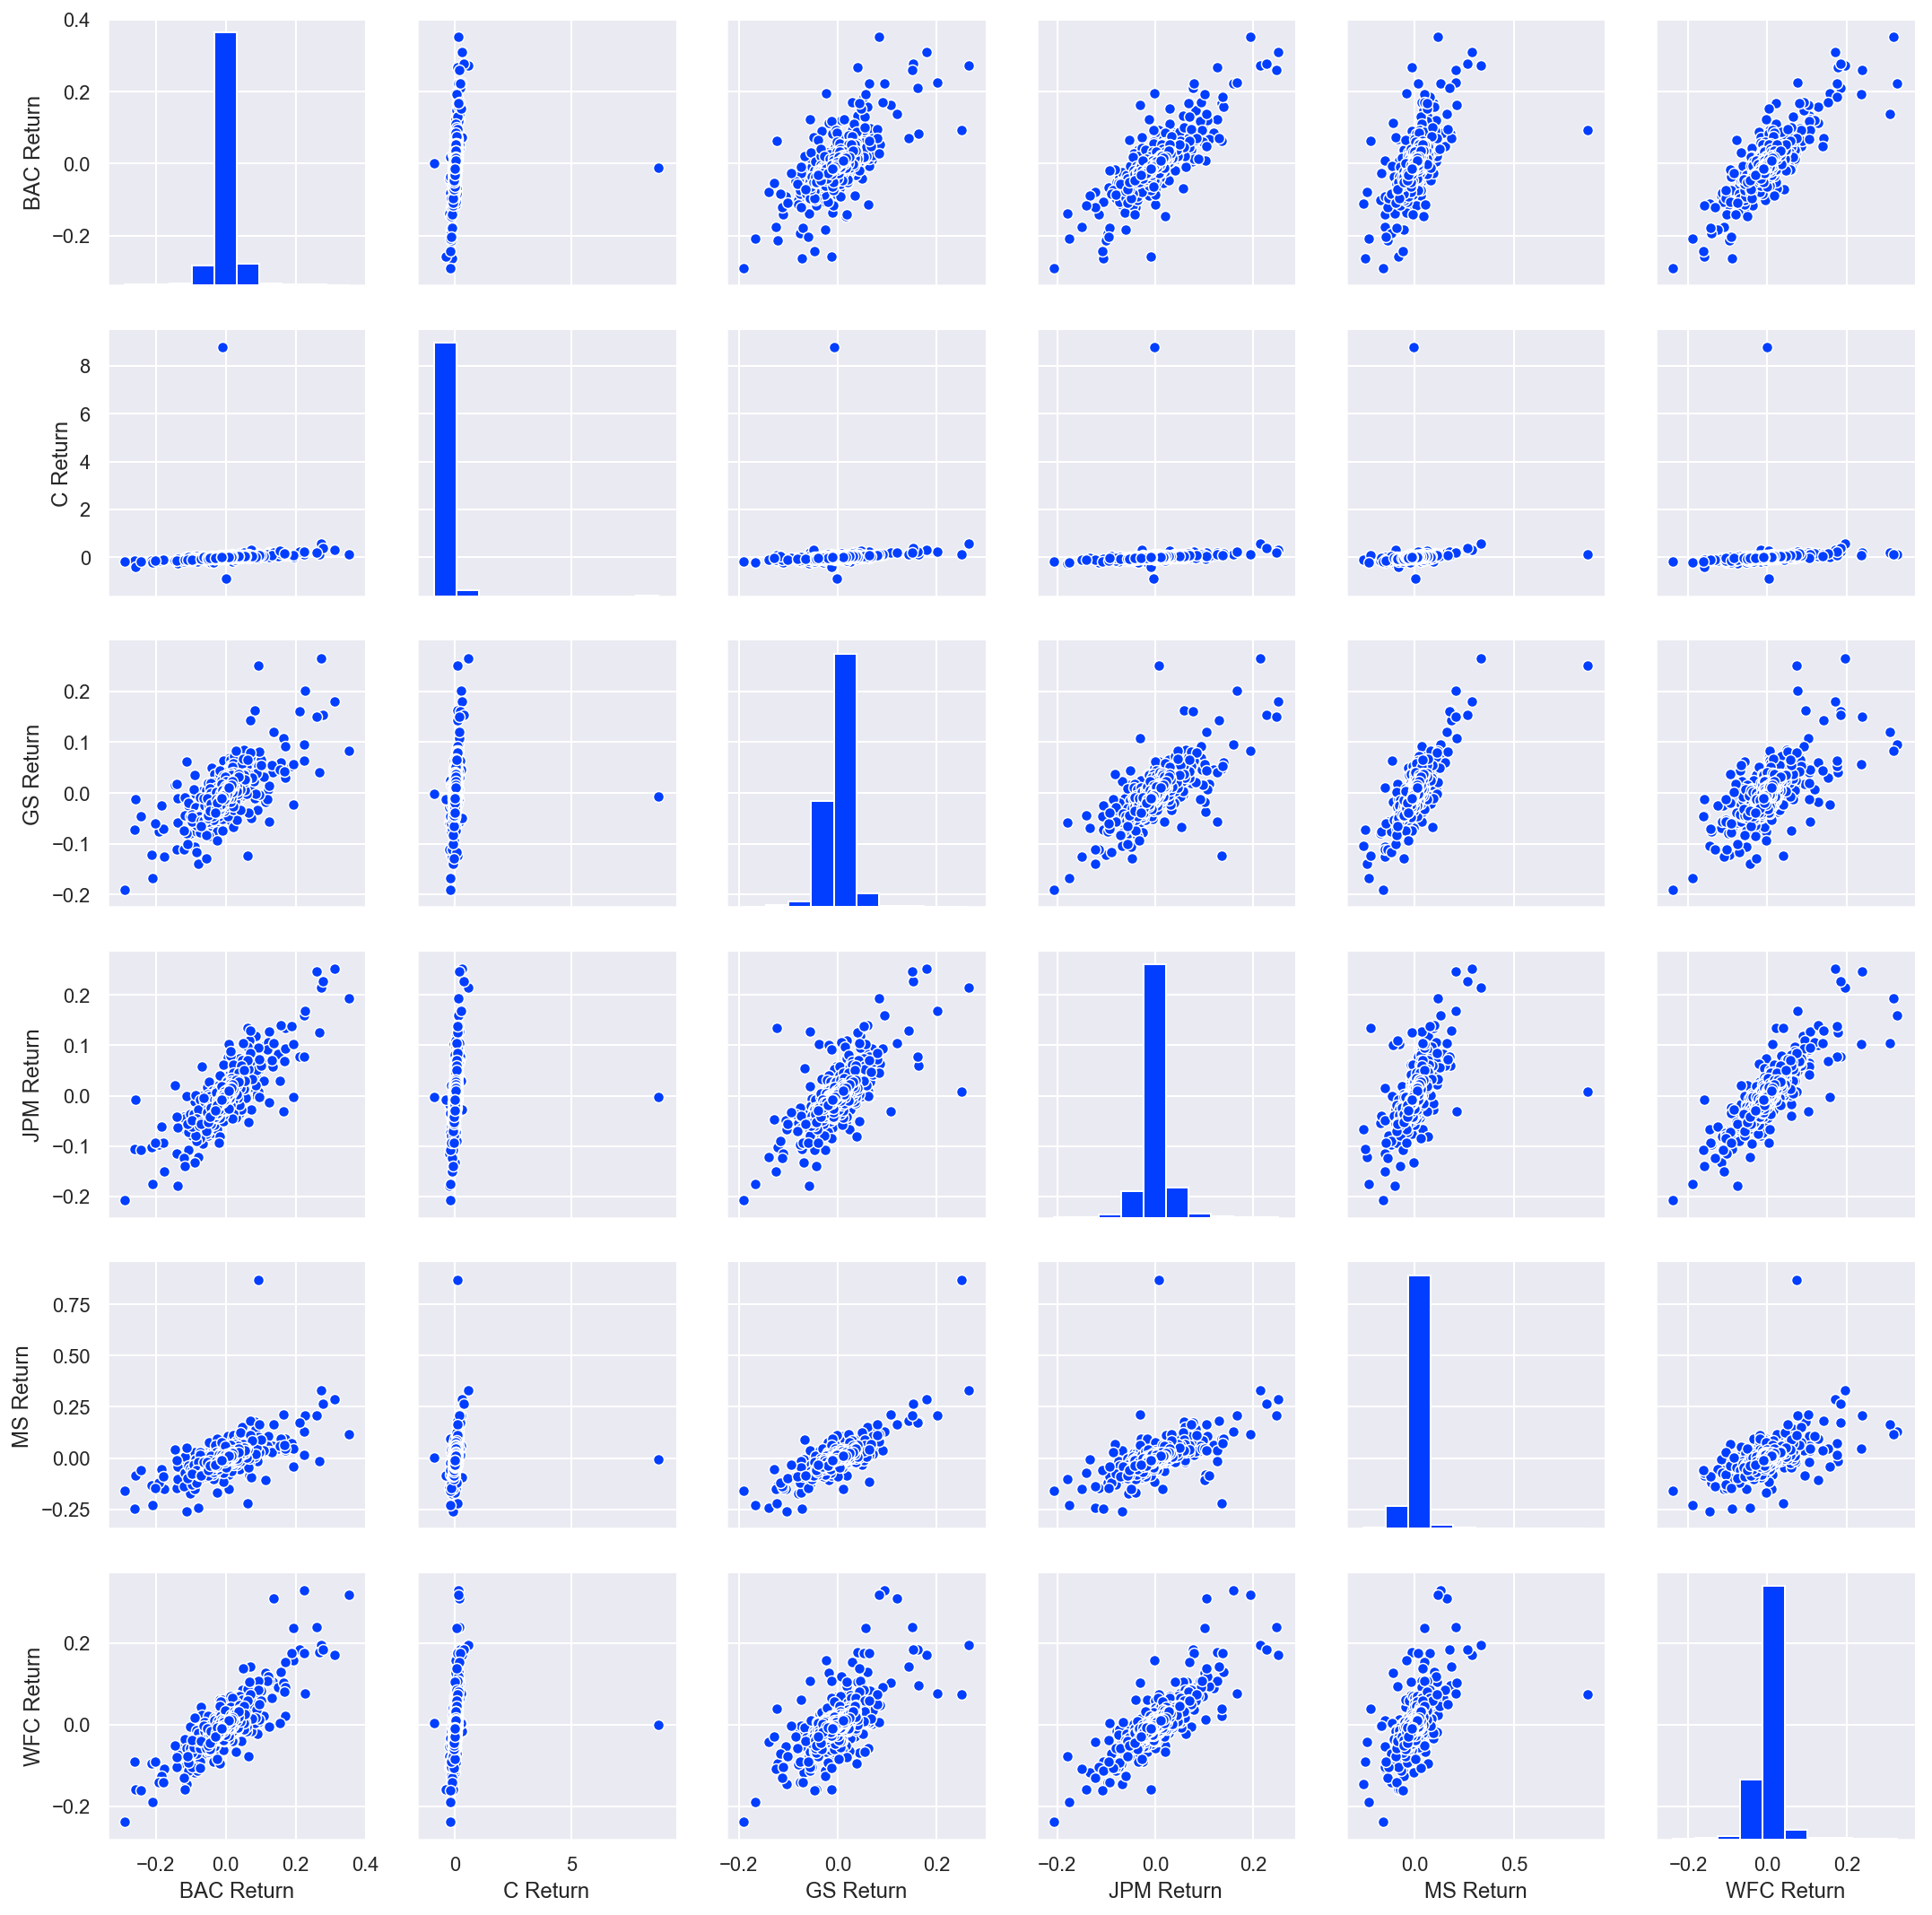

In [44]:
import seaborn as sns
sns.set(palette='bright')
sns.pairplot(returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.**

In [45]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**

In [46]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [47]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [48]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley.**

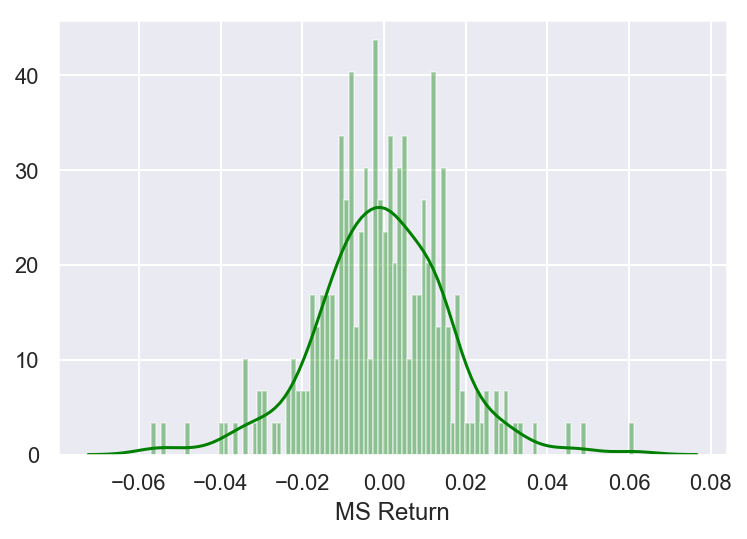

In [49]:
sns.distplot(returns.loc["2015-01-01":"2015-12-31", "MS Return"], 
             bins=100, 
             color="green") 

**Create a distplot using seaborn of the 2008 returns for CitiGroup.**

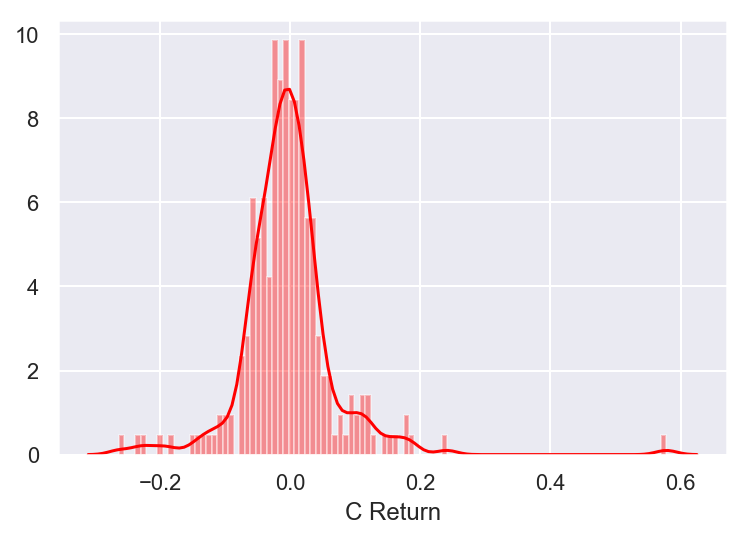

In [50]:
sns.distplot(returns.loc["2008-01-01":"2008-12-31", "C Return"], 
             bins=100, 
             color="red") 

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [51]:
import matplotlib.pyplot as plt

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time.**

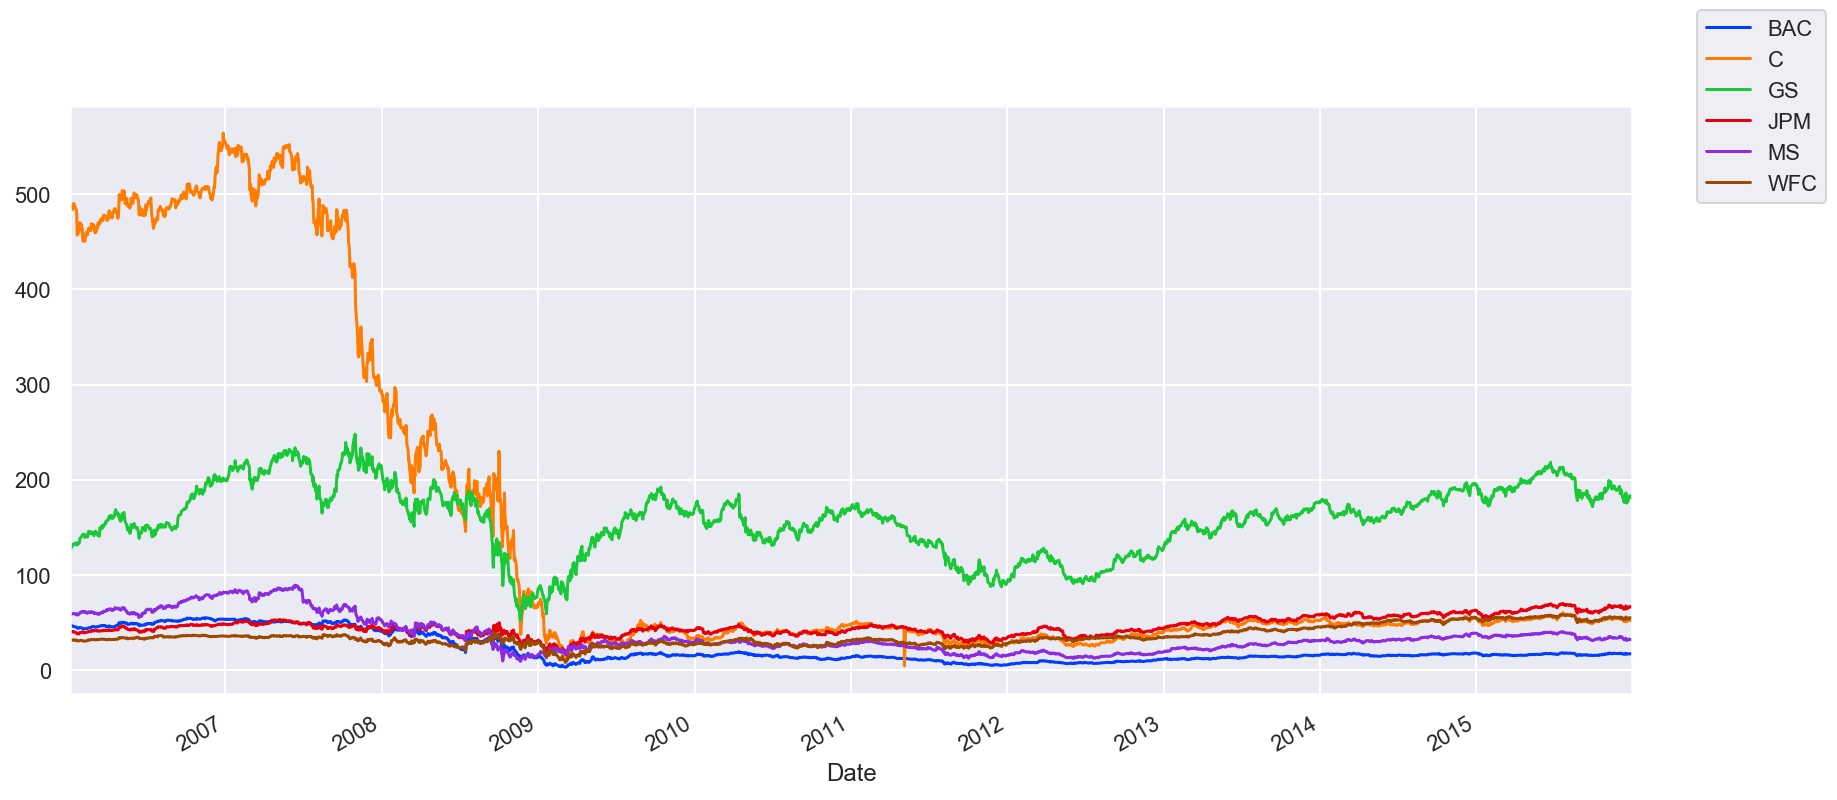

In [52]:
close_price = plt.figure(figsize=(14, 6))
for ticker in tickers:
    bank_stocks[ticker]["Close"].plot.line(label=ticker)
close_price.legend(["BAC", "C", "GS", "JPM", "MS", "WFC"])

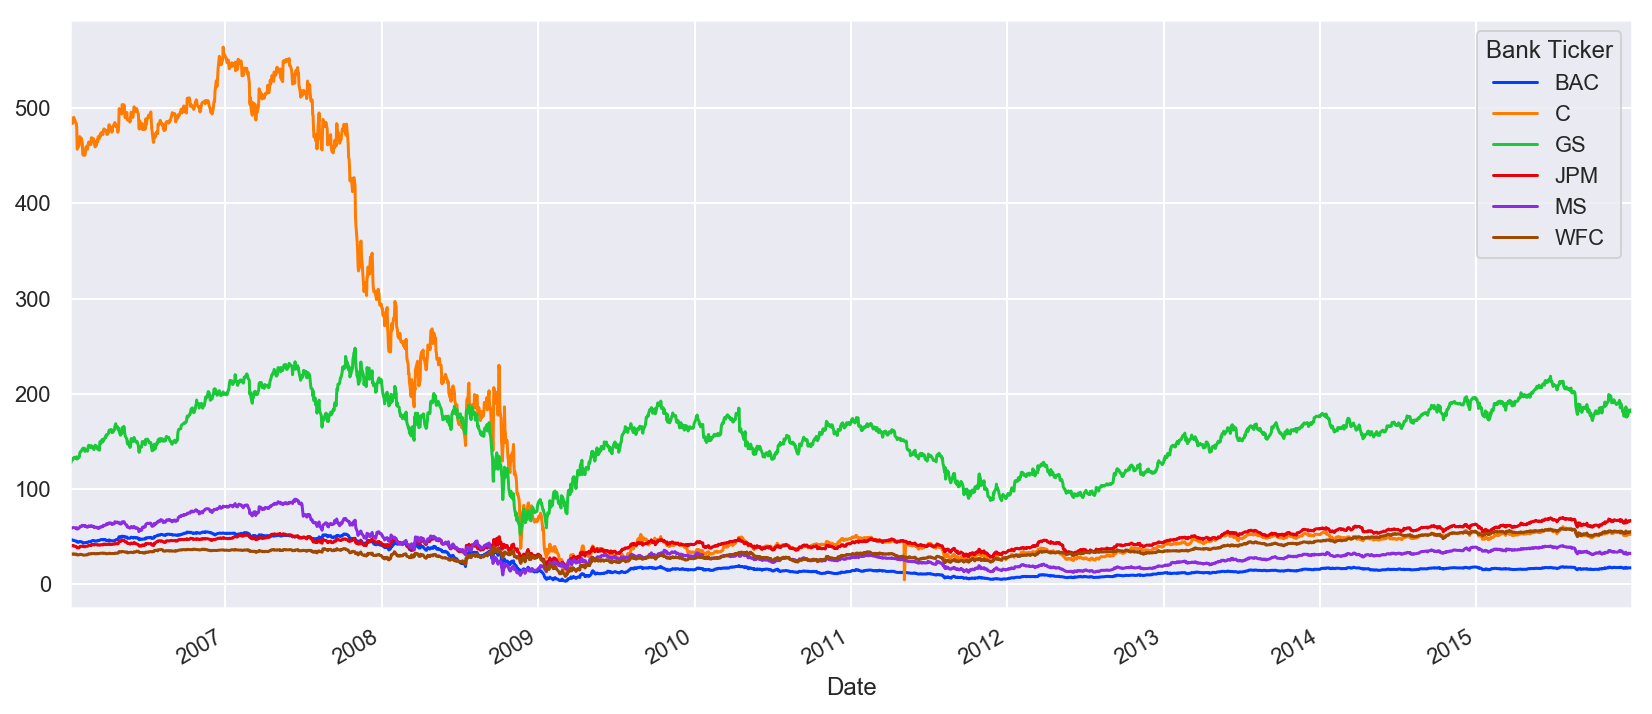

In [53]:
bank_stocks.xs(key="Close", 
               axis=1, 
               level="Stock Info").plot.line(figsize=(14, 6))

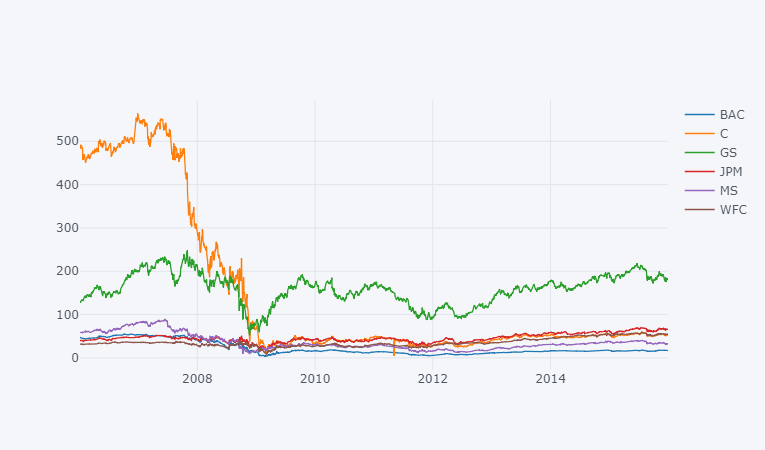

In [54]:
bank_stocks.xs(key="Close", 
               axis=1, 
               level="Stock Info").iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.**

In [55]:
bank_stocks["BAC"].loc["2008-01-01":"2008-12-31", "Close"].rolling(window=30).mean().head()

Date
2008-01-02   NaN
2008-01-03   NaN
2008-01-04   NaN
2008-01-07   NaN
2008-01-08   NaN
Name: Close, dtype: float64

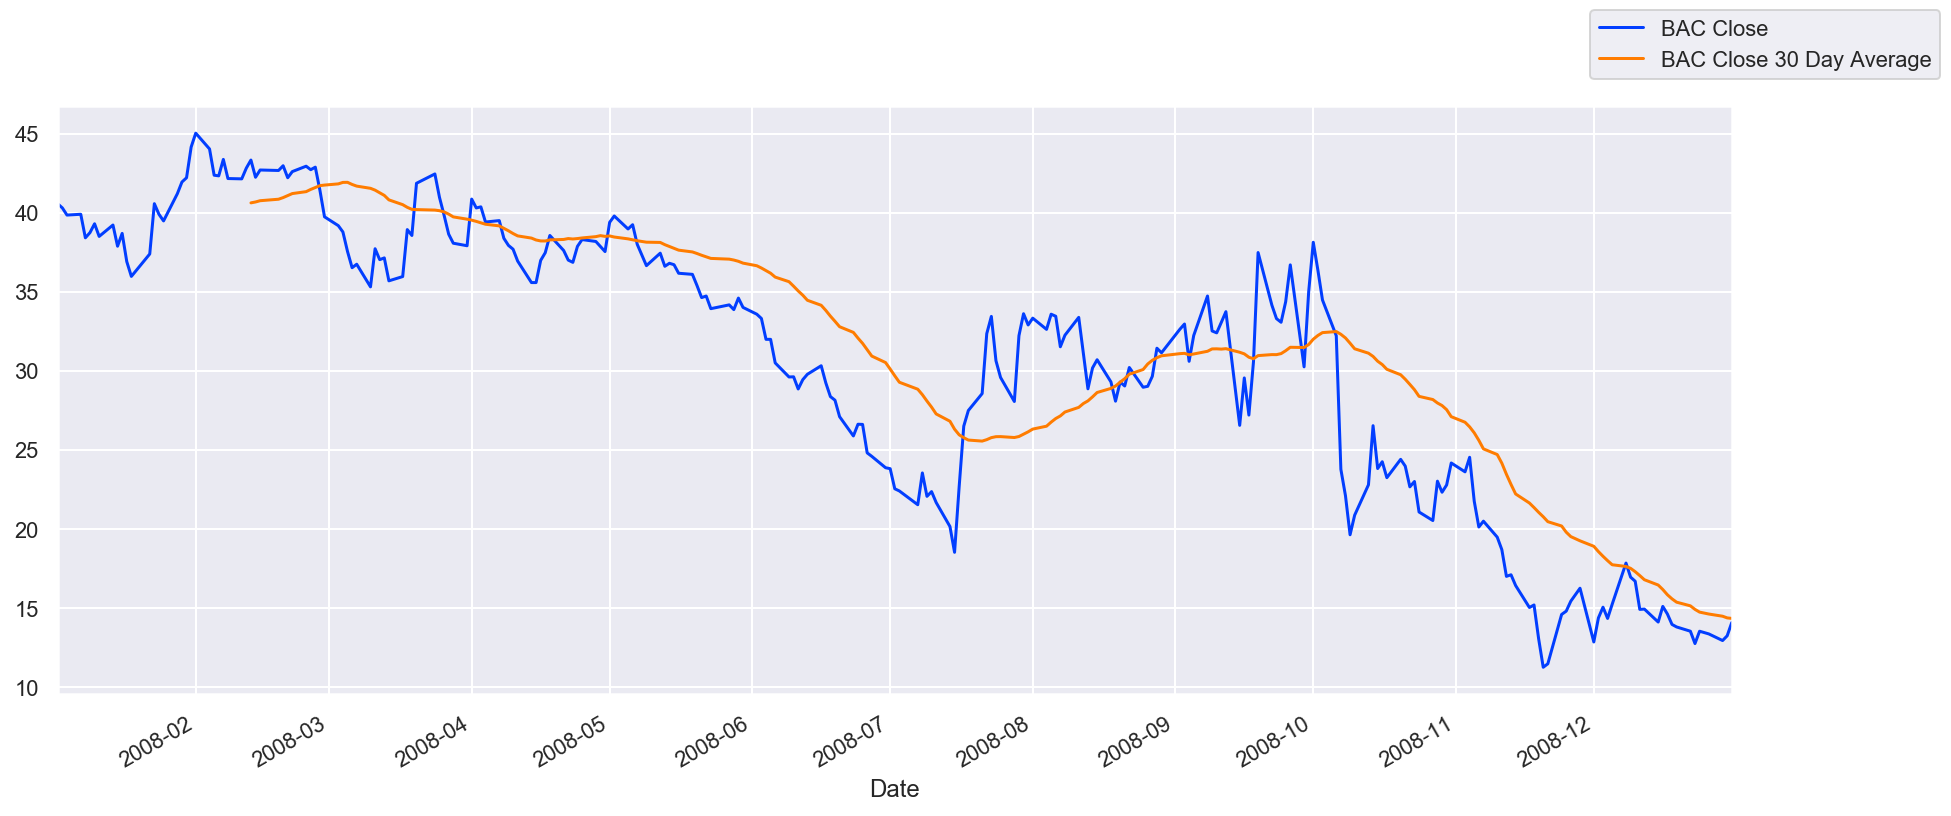

In [56]:
ma = plt.figure(figsize=(15, 6))
bank_stocks["BAC"].loc["2008-01-01":"2008-12-31", "Close"].plot.line()
bank_stocks["BAC"].loc["2008-01-01":"2008-12-31", "Close"].rolling(window=30).mean().plot.line()
ma.legend(["BAC Close", "BAC Close 30 Day Average"])

**Create a heatmap of the correlation between the stocks Close Price.**

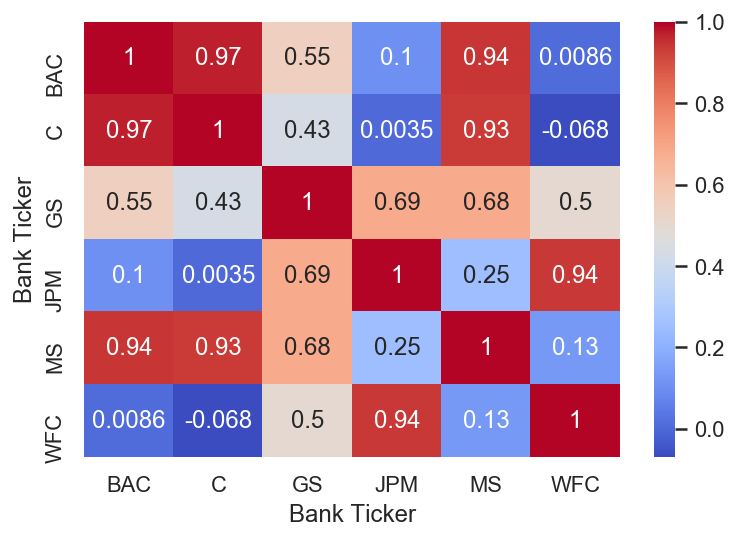

In [57]:
sns.heatmap(bank_stocks.xs(key="Close", axis=1, level="Stock Info").corr(), 
            annot=True, 
            cmap="coolwarm")

**Optional: Use seaborn's clustermap to cluster the correlations together:**

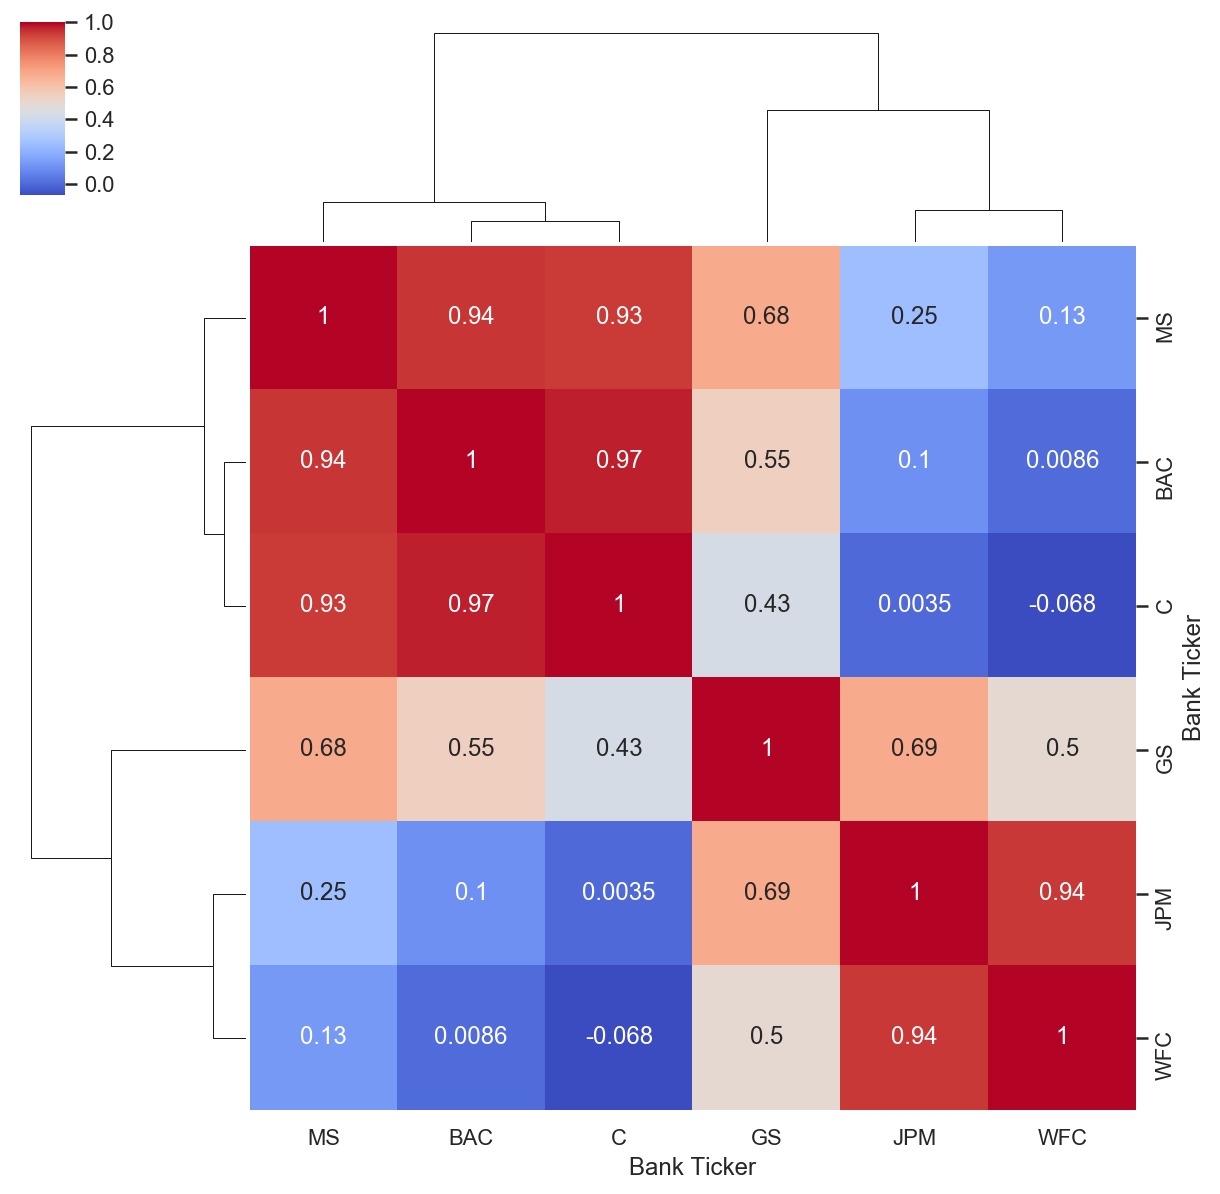

In [58]:
sns.clustermap(bank_stocks.xs(key="Close", axis=1, level="Stock Info").corr(), 
               annot=True, 
               cmap="coolwarm")

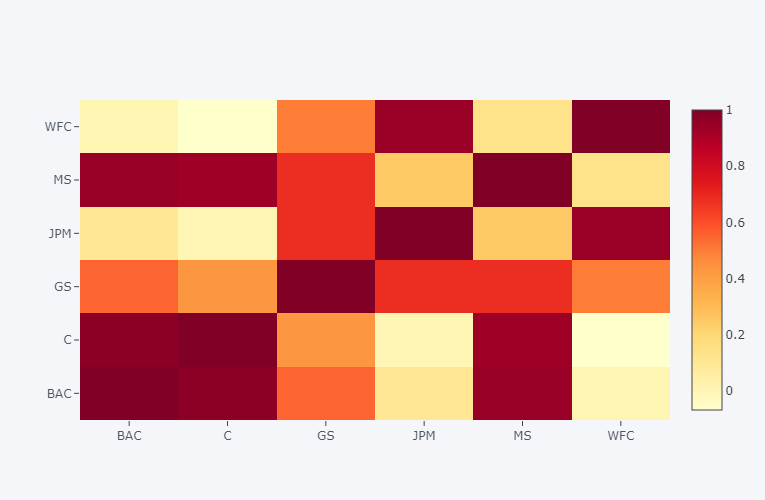

In [59]:
bank_stocks.xs(key="Close", 
               axis=1, 
               level="Stock Info").corr().iplot(kind="heatmap",
                                                colorscale="YlOrRd",
                                                dimensions=(600, 500))

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

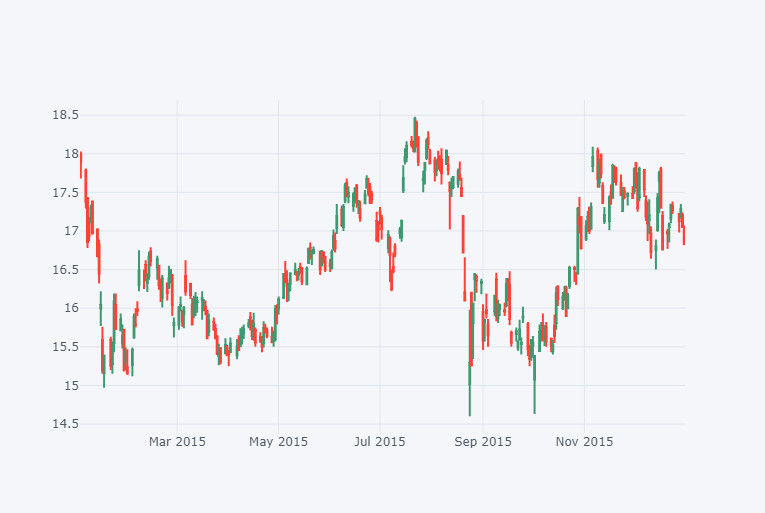

In [60]:
bank_stocks.loc["2015-01-01":"2016-01-01", "BAC"].iplot(kind="candle", 
                                                        dimensions=(900, 500))

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

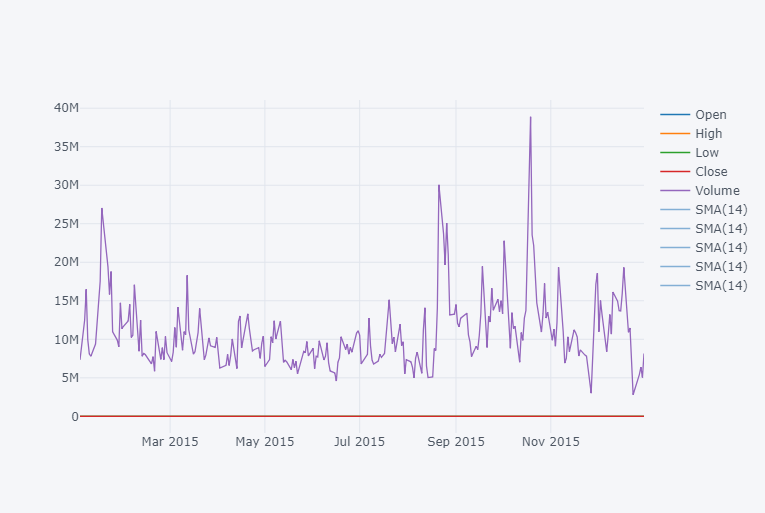

In [61]:
bank_stocks.loc["2015-01-01":"2016-01-01", "MS"].ta_plot(study='sma', 
                                                         dimensions=(900, 500))

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

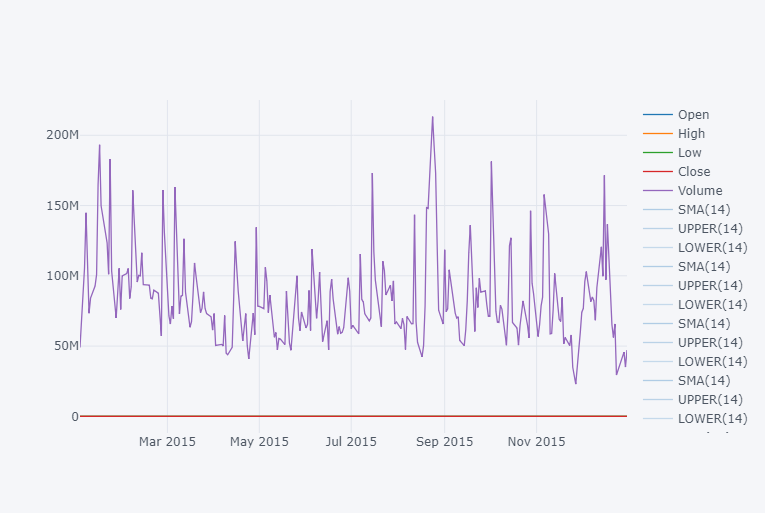

In [62]:
bank_stocks.loc["2015-01-01":"2016-01-01", "BAC"].ta_plot(study='boll', 
                                                          dimensions=(900, 500))